In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import requests
from bs4 import BeautifulSoup as bs
import zipfile
import io
import json
import matplotlib.dates as mdates

In [2]:
url = "https://webrobots.io/kickstarter-datasets/"
response = requests.get(url)
soup = bs(response.content, "html.parser")
csv_links = []

# Find links to CSV files
for link in soup.find_all('a'):
    href = link.get('href')
    if href and href.endswith('.zip'):
        filename = href.split("/")[-1]
        date_str = filename.split("_")[1]
        if date_str >= "2020-12":
            csv_links.append(href)

# Download and process CSV files
dfs = []
for link in csv_links:
    # Download zip file from link
    response = requests.get(link)
    # Create a BytesIO object from the zip file content
    zip_file = io.BytesIO(response.content)
    # Extract CSV files from the zip archive and load them into pandas dataframes
    with zipfile.ZipFile(zip_file, "r") as zip_ref:
        csv_files = [name for name in zip_ref.namelist() if name.endswith('.csv')]
        for csv_file in csv_files:
            with zip_ref.open(csv_file) as file:
                df = pd.read_csv(file)
                df = df.rename(columns={'goal': 'goal_usd'})
                # Keep only the desired columns
                columns_to_keep = [ 'launched_at', 'backers_count','country','state', 'usd_pledged', 'category',
                                   'goal_usd']
                df = df[columns_to_keep]
                # Convert date columns to datetime
                df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s')
                
                # Append dataframe to list
                dfs.append(df)

# Concatenate all dataframes into one
df_webrobot = pd.concat(dfs)


In [3]:


def get_category_name(json_str):
    data = json.loads(json_str)
    return data.get('parent_name','unknown')

df_webrobot['category'] = df_webrobot['category'].apply(get_category_name)



In [4]:
df_webrobot

,launched_at,backers_count,country,state,usd_pledged,category,goal_usd
0,2016-03-16 14:35:24,362,US,successful,88701.000000,Technology,75000.0
1,2016-03-15 17:05:02,125,US,successful,124293.000000,Technology,115000.0
2,2016-03-09 12:01:08,252,US,successful,76694.000000,Technology,50000.0
3,2016-03-08 12:26:58,22,CA,successful,1195.593020,Technology,400.0
4,2016-03-05 00:01:27,484,US,successful,21850.990000,Technology,15000.0
...,...,...,...,...,...,...,...
3145,2017-05-31 17:37:07,1,US,failed,10.000000,Publishing,500.0
3146,2015-01-28 16:43:38,6,GB,failed,244.588849,Film & Video,30000.0
3147,2017-07-29 03:07:34,5,MX,canceled,287.559221,Food,350000.0
3148,2015-08-30 21:17:44,51,GB,successful,1683.874823,Music,1000.0


In [5]:
df_kaggle =pd.read_csv('Kickstarter Campaigns DataSet.csv' , index_col=0)
df_kaggle = df_kaggle[['launched_at', 'backers_count', 'country','status', 'usd_pledged', 'sub_category', 'goal_usd']]
df_kaggle = df_kaggle.rename(columns={'status': 'state', 'sub_category': 'category'})
df_kaggle['category'] = df_kaggle['category'].str.capitalize()
df_kaggle

,launched_at,backers_count,country,state,usd_pledged,category,goal_usd
0,2018-02-10 22:47:52,16,CA,failed,577.902078,Food,785.82065
1,2014-11-21 10:42:26,7,US,successful,211.000000,Publishing,93.00000
2,2020-10-19 05:26:59,99,US,successful,4697.000000,Food,1500.00000
3,2019-05-29 16:01:34,3,US,failed,222.000000,Technology,25000.00000
4,2015-11-19 20:36:01,100,US,successful,5410.000000,Publishing,5000.00000
...,...,...,...,...,...,...,...
217248,2017-05-31 17:37:07,1,US,failed,10.000000,Publishing,500.00000
217249,2015-01-28 16:43:38,6,GB,failed,244.588849,Film & video,40621.01400
217250,2017-07-29 03:07:34,5,MX,canceled,287.559221,Food,17662.55400
217251,2015-08-30 21:17:44,51,GB,successful,1683.874823,Music,1354.03380


In [6]:
df = pd.concat([df_webrobot, df_kaggle], axis=0)
df['category'] = df['category'].str.lower().str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349293 entries, 0 to 217252
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   launched_at    object 
 1   backers_count  int64  
 2   country        object 
 3   state          object 
 4   usd_pledged    float64
 5   category       object 
 6   goal_usd       float64
dtypes: float64(2), int64(1), object(4)
memory usage: 143.4+ MB


In [7]:
df.describe()
nRow, nCol = df.shape

print(f'There are {nRow} rows and {nCol} columns')

There are 2349293 rows and 7 columns


In [8]:
df.describe()

,backers_count,usd_pledged,goal_usd
count,2.349293e+06,2.347725e+06,2.349293e+06
mean,1.601275e+02,1.524074e+04,5.011768e+04
std,9.573008e+02,1.291944e+05,1.197591e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+00,1.510000e+02,1.500000e+03
50%,3.100000e+01,1.851000e+03,5.000000e+03
75%,1.000000e+02,7.511000e+03,1.500000e+04
max,1.853410e+05,4.175415e+07,1.354034e+08


In [9]:
print("duplicates: ", df.duplicated().sum())
df.drop_duplicates(inplace=True, ignore_index=True)

# original row-length was  1885897. check after removal of duplicates
print("length of dataset after removal of duplicates is ", len(df))

duplicates:  1885897
length of dataset after removal of duplicates is  463396


In [10]:
#Convert the 'launched_at' column to datetime format
df['launched_at'] = pd.to_datetime(df['launched_at'])
# Create a timestamp for January 1st, 2010
start_date = pd.Timestamp('2010-01-01')

# Filter the dataframe to only include rows where launched_at is after or equal to start_date
df = df[df['launched_at'] >= start_date]
year_count = df['launched_at'].dt.year.value_counts().sort_index()

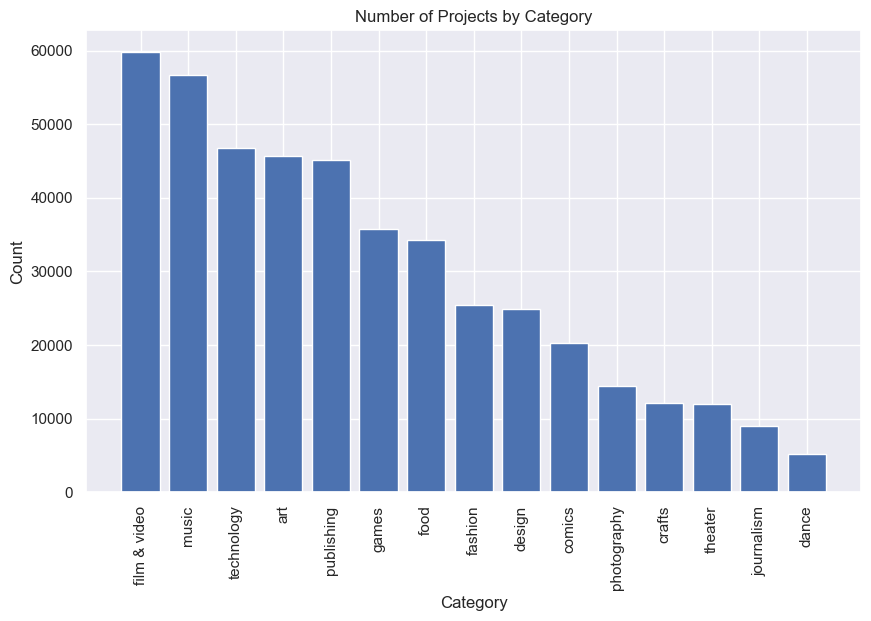

In [12]:
df.drop(df[df['category'] == 'unknown'].index, inplace=True)
# Get the count of projects by category
counts = df['category'].value_counts()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(counts.index, counts.values, color='b')

# Set the title, x-axis and y-axis labels
plt.title('Number of Projects by Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


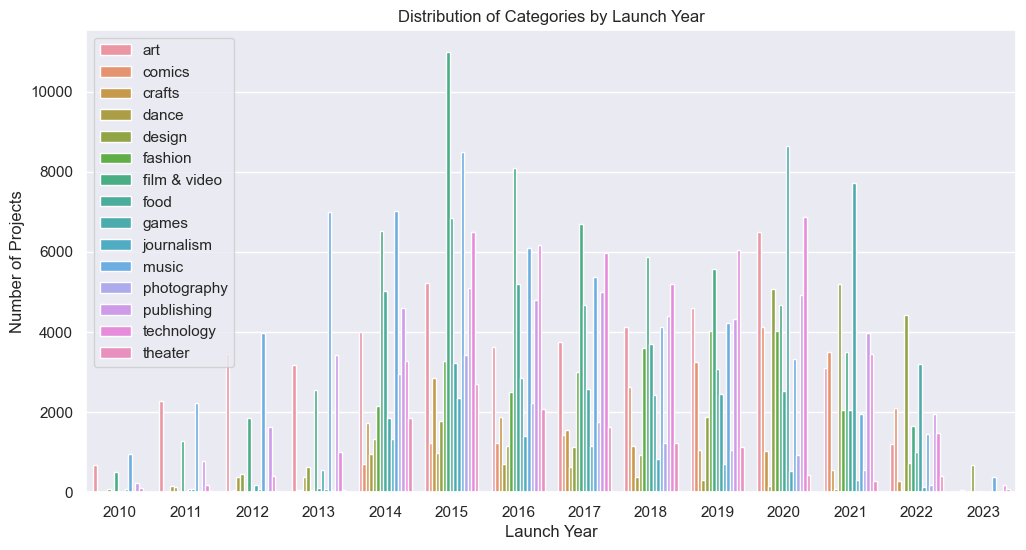

In [70]:
# Extract the year from the 'launched_at' column
df['year'] = df['launched_at'].dt.year

# Group the data by category and year, and count the number of projects in each group
category_counts = df.groupby(['category', 'year'])['category'].count().reset_index(name='count')

# Create a bar plot
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='count', hue='category', data=category_counts)
plt.title('Distribution of Categories by Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Number of Projects')
plt.legend(loc='upper left')
plt.show()


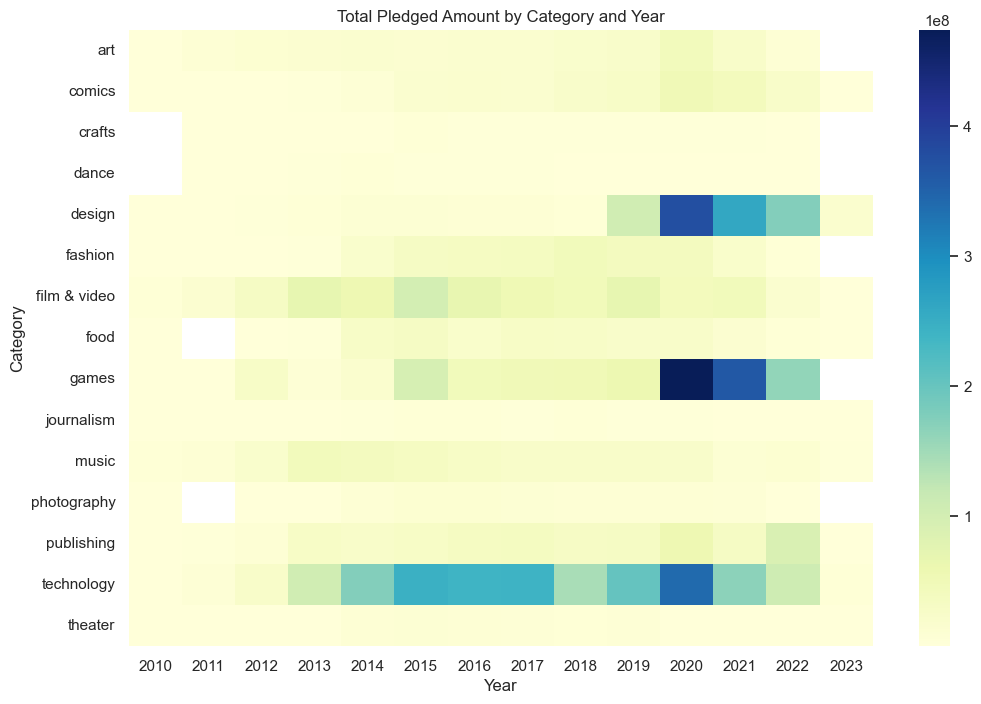

In [71]:
# Pivot the data into a matrix
category_year_matrix = df.pivot_table(values='usd_pledged', index='category', columns='year', aggfunc='sum')

# Create a heatmap
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.heatmap(category_year_matrix, cmap='YlGnBu')
plt.title('Total Pledged Amount by Category and Year')
plt.xlabel('Year')
plt.ylabel('Category')
plt.show()


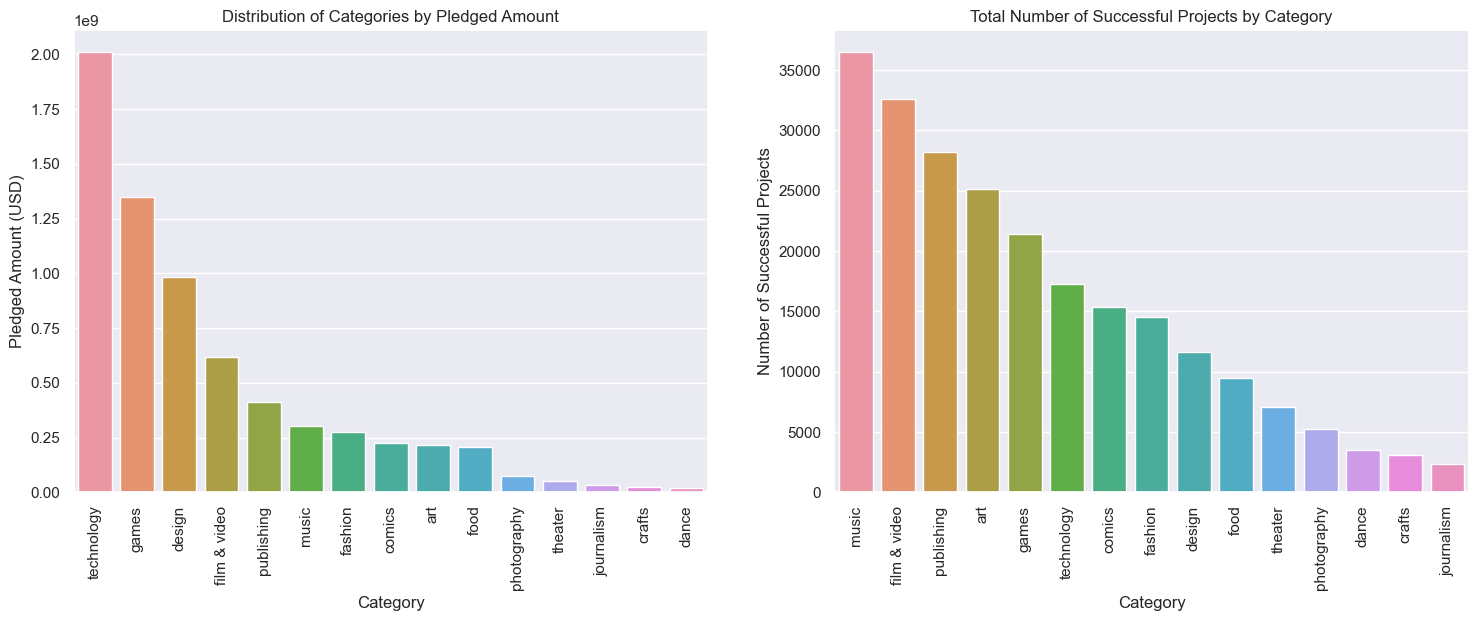

In [52]:
# Group the data by category and calculate the total pledged amount for each category
category_pledged = df.groupby('category')['usd_pledged'].sum().reset_index()

# Sort the categories by pledged amount in descending order
category_pledged = category_pledged.sort_values('usd_pledged', ascending=False)

# Filter the successful projects
successful_projects = df[df['state'] == 'successful']

# Group the data by category and count the number of successful projects in each category
category_success_counts = successful_projects.groupby('category')['category'].count().reset_index(name='count')

# Sort the categories by the count in descending order
category_success_counts = category_success_counts.sort_values('count', ascending=False)

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot the distribution of categories by pledged amount in the first subplot
sns.barplot(x='category', y='usd_pledged', data=category_pledged, ax=axes[0])
axes[0].set_title('Distribution of Categories by Pledged Amount')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Pledged Amount (USD)')
axes[0].tick_params(axis='x', rotation=90)

# Plot the total number of successful projects by category in the second subplot
sns.barplot(x='category', y='count', data=category_success_counts, ax=axes[1])
axes[1].set_title('Total Number of Successful Projects by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Number of Successful Projects')
axes[1].tick_params(axis='x', rotation=90)

# Show the plot
plt.show()


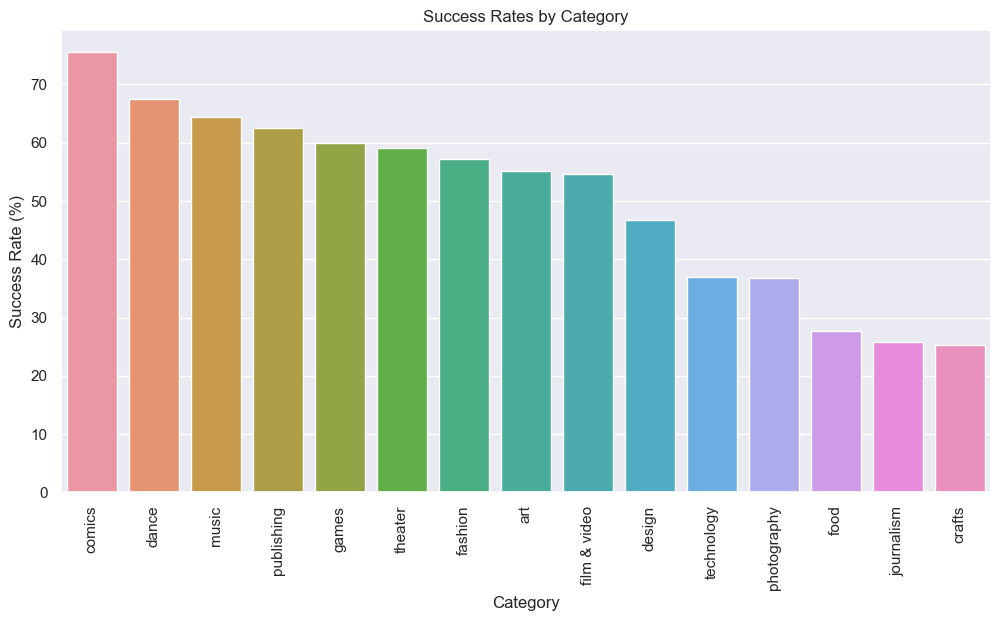

In [58]:
# Group the data by category and count the number of projects in each category
category_counts = df.groupby('category')['category'].count().reset_index(name='total')

# Group the successful projects by category and count the number of successful projects in each category
successful_projects = df[df['state'] == 'successful']
success_counts = successful_projects.groupby('category')['category'].count().reset_index(name='success')

# Merge the total and success counts by category
category_rates = pd.merge(category_counts, success_counts, on='category')

# Calculate the success rate as a percentage for each category
category_rates['success_rate'] = category_rates['success'] / category_rates['total'] * 100

# Sort the categories by success rate in descending order
category_rates = category_rates.sort_values('success_rate', ascending=False)

# Create a bar plot of the success rates by category
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='success_rate', data=category_rates)
plt.title('Success Rates by Category')
plt.xlabel('Category')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=90)
plt.show()


<Figure size 1200x600 with 0 Axes>

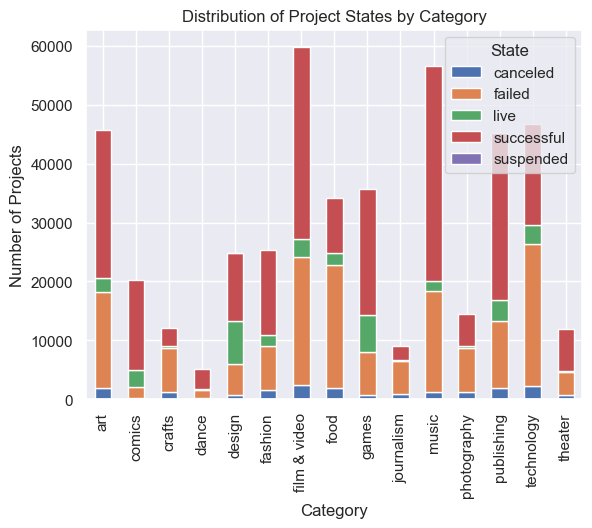

In [59]:
# Group the data by category and state and count the number of projects in each group
category_state_counts = df.groupby(['category', 'state'])['state'].count().reset_index(name='count')

# Pivot the data to create a table with categories as rows and project states as columns
category_state_counts_pivot = category_state_counts.pivot(index='category', columns='state', values='count').fillna(0)

# Create a stacked bar chart
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
category_state_counts_pivot.plot(kind='bar', stacked=True)
plt.title('Distribution of Project States by Category')
plt.xlabel('Category')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90)
plt.legend(title='State', loc='upper right')
plt.show()


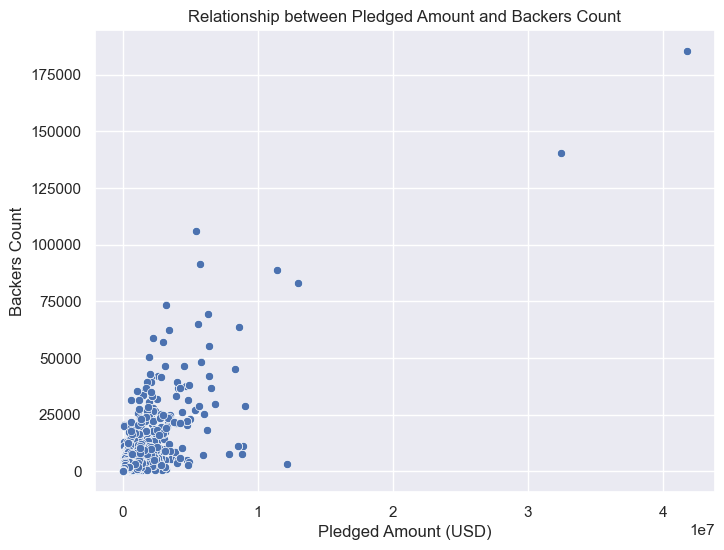

In [72]:
# Create a scatter plot
sns.set(style='darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='usd_pledged', y='backers_count', data=df)
plt.title('Relationship between Pledged Amount and Backers Count')
plt.xlabel('Pledged Amount (USD)')
plt.ylabel('Backers Count')
plt.show()


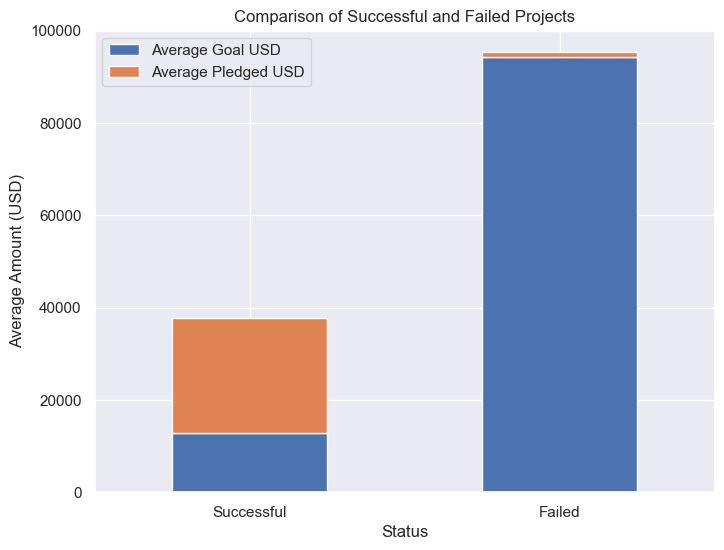

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data by successful and failed projects
successful_projects = df[df['state'] == 'successful']
failed_projects = df[df['state'] == 'failed']

# Calculate the average goal and pledged amount for successful and failed projects
success_mean_goal = successful_projects['goal_usd'].mean()
success_mean_pledged = successful_projects['usd_pledged'].mean()
fail_mean_goal = failed_projects['goal_usd'].mean()
fail_mean_pledged = failed_projects['usd_pledged'].mean()

# Create a DataFrame with the average values
data = pd.DataFrame({'Average Goal USD': [success_mean_goal, fail_mean_goal],
                     'Average Pledged USD': [success_mean_pledged, fail_mean_pledged]},
                    index=['Successful', 'Failed'])

# Create a stacked bar chart
ax = data.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Comparison of Successful and Failed Projects')
plt.xlabel('Status')
plt.ylabel('Average Amount (USD)')
plt.xticks(rotation=0)
plt.show()


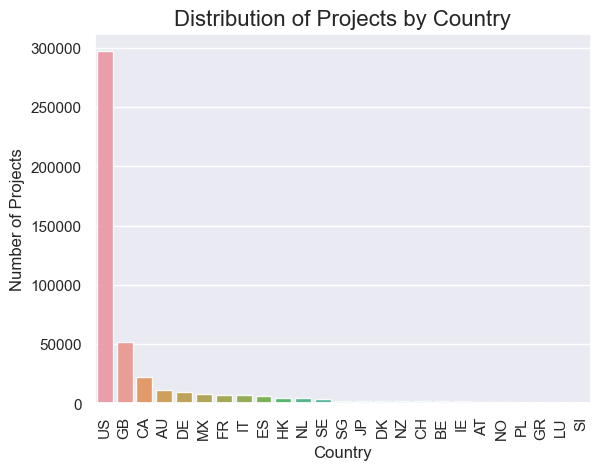

In [68]:
# Get the number of projects by country
projects_by_country = df['country'].value_counts()

# Plot the distribution of projects by country
sns.set(style="darkgrid")
sns.barplot(x=projects_by_country.index, y=projects_by_country.values, alpha=0.9)
plt.title('Distribution of Projects by Country', fontsize=16)
plt.ylabel('Number of Projects', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=90, horizontalalignment="center")
plt.show()


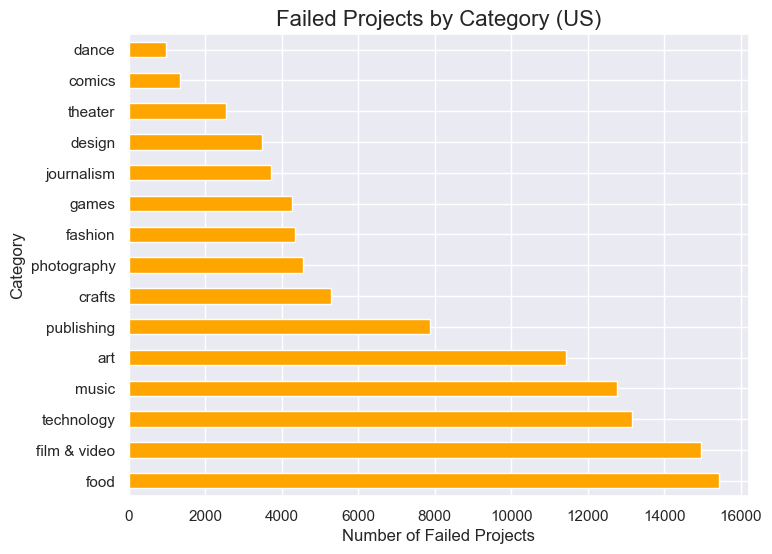

In [69]:
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
failed_by_category.plot(kind='barh', color='orange', ax=ax)

# Set the chart title and labels
ax.set_title('Failed Projects by Category (US)', fontsize=16)
ax.set_xlabel('Number of Failed Projects', fontsize=12)
ax.set_ylabel('Category', fontsize=12)

# Show the plot
plt.show()